### Question 1

In [1]:
from numpy import empty, zeros, max
import timeit
import matplotlib.pyplot as plt

Pour employer la méthode de Gauss-Seidel, on doit ajouter à chaque itération à chaque élément la moyenne des éléments environnants de l'array. Quand la solution se sera "stabilisée", la différence entre chaque pas sera petite, ce qui permet d'arrêter la boucle lorsque la différence entre chaque aps atteint un certain seuil. Pour la méthode de Gauss-Seidel, on remplace directement les éléments dans l'array de solution *phi*.

Sachant que les parois sont à $V=0$ et que les plaques, indiquées sur la figure 1, sont à $V=\pm 1$, on peut écrire la fonction *gauss_seidel* suivante qui intialise l'array et qui calcule la solution:

À noter que ce code est directement inspiré de l'exemple donné dans les notes de cours du cours.

In [2]:
# BUT: Résoudre le problème du capaciteur électronique avec la méthode de Gauss-Seidel avec surrelaxation
# Arguments:
# M: nombre de carrés par côté dans l'array de la solution
# V: valeur absolue du potentiel de chaque plaque (la plaque gauche est négative et la plaque droite est positive) en volts
# omega: Facteur de surrelaxation
# target: précision recherchée

def gauss_seidel(M, V, omega, target):
    
    # On crée un array de dimension M+1 x M+1 (donc M carrés x M carrés)
    phi = zeros([M+1, M+1], float)

    # On initialise avec les conditions aux frontières, soit +/- V sur les plaques
    phi[20:80,20] = V
    phi[20:80,80] = -V

    # On initialise l'array dphi, soit la différence de chaque point avec sa valeur précédente
    dphi = zeros([M+1,M+1], float)

    delta = 1
    start = timeit.default_timer()

    # On boucle sur tous les éléments de phi tant que la différence maximale d'un pas est supérieure à target
    while delta > target:

        for i in range(1,M):
            for j in range(1,M):

                # Si le point est sur une des parois ou sur une des plaques, on remet la condition frontière

                # Les parois sont exclues de range(1,M)
                
                # Sur la plaque gauche
                if j==20 and i>=20 and i<=80:
                    phi[i,j] = V

                # Sur la plaque droite
                elif j==80 and i>=20 and i<=80:
                    phi[i,j] = -V

                # N'importe où ailleurs, on calcule la nouvelle valeur
                else: 
                    dphi[i,j] = (1+omega)*((phi[i+1,j]+phi[i-1,j]
                                            +phi[i,j+1]+phi[i,j-1])/4-phi[i,j])
                    phi[i,j] += dphi[i,j]

        # On calcule la différence maximale avec les anciennes valeurs
        delta = max(abs(dphi))

    end = timeit.default_timer()

    print(f"Temps d'éxécution pour Gauss-Seidel = {end-start:.3f} secondes")

    return phi

On peut aussi écrire une fonction *plot_solution* qu'on pourra appeler à chaque fois qu'on veut grapher la carte thermique de la solution:

In [3]:
# BUT: Grapher la solution obtenue par résolution numérique en carte thermique
# Arguments:
# phi: array solution
# method: string du nom de la méthode pour le titre du graphique

def plot_solution(phi, method):

    plt.imshow(phi)
    plt.title(f"Carte thermique de la solution avec la méthode de {method}")
    plt.xlabel("x [mm]")
    plt.ylabel("y [mm]")
    plt.plasma()
    plt.colorbar()
    plt.show()

Pour les problèmes #1 et #2, on souhaite avoir des carrés de solution de 100x100 ($M=100$), un potentiel sur les plaques de $V=\pm 1$, une précision de $1\times 10^{-5}$ et un facteur de surrelaxation de $\omega=0,9$ (seulement applicable dans le cas de la méthode de Gauss-Seidel; il est écrit dans l'énoncé d'employer la méthode de Gauss-Seidel avec surrelaxation, mais après discussion avec le professeur cela signifie la *sur*relaxation).

In [4]:
M = 100         # Nombre de carrés
V = 1           # Valeur absolue du potentiel des plaques
omega = 0.9     # Facteur de surrelaxation
target = 1e-5   # Précision recherchée

On obtient alors la solution avec la méthode de Gauss-Seidel:

Temps d'éxécution pour Gauss-Seidel = 6.735 secondes


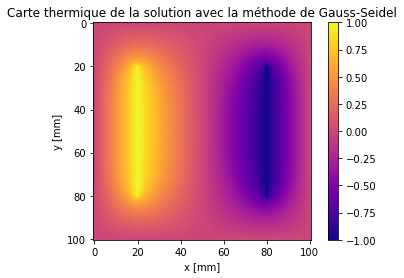

In [5]:
plot_solution(gauss_seidel(M, V, omega, target), "Gauss-Seidel")

### Question 2

On s'intéresse maintenant à la méthode de Jacobi, avec et sans slicing. La différence entre la méthode de Jacobi et celle de Gauss-Seidel est qu'alors que Gauss-Seidel modifie directement l'array de solution lorsqu'il calcule la nouvelle valeur, la méthode de Jacobi insère les nouvelles valeurs dans un array temporaire et rend cet array temporaire le nouvel array solution à la fin de l'itération. Cela a pour effet de, théoriquement, faire converger Gauss-Seidel plus rapidement étant donné que certaines des valeurs utilisées pour calculer un nouveau pas ont été mises à jour au préalable. Vérifions si cette hypothèse est correcte:

In [6]:
# BUT: Résoudre le problème du capaciteur électronique avec la méthode de Jacobi
# Arguments:
# M: nombre de carrés par côté dans l'array de la solution
# V: valeur absolue du potentiel de chaque plaque (la plaque gauche est négative et la plaque droite est positive) en volts
# target: précision recherchée

def jacobi(M, V, target):

    # On crée un array de dimension M+1 x M+1 (donc M carrés x M carrés)
    phi = zeros([M+1, M+1], float)
    phiprime = empty([M+1, M+1], float)

    # On initialise avec les conditions aux frontières, soit +/- V sur les plaques
    phi[20:80,20] = V
    phi[20:80,80] = -V

    delta = 1

    start = timeit.default_timer()

    # On boucle sur tous les éléments de phi tant que la différence maximale d'un pas est supérieure à target
    while delta > target:

        for i in range(1,M):
            for j in range(1,M):

                # Si le point est sur une des parois ou sur une des plaques, on remet la condition frontière

                # Les parois sont exclues de range(1,M)
                
                # Sur la plaque gauche
                if j==20 and i>=20 and i<=80:
                    phiprime[i,j] = V

                # Sur la plaque droite
                elif j==80 and i>=20 and i<=80:
                    phiprime[i,j] = -V

                # N'importe où ailleurs, on calcule la nouvelle valeur
                else:
                    phiprime[i,j] = (phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4

        # On calcule la différence maximale avec les anciennes valeurs
        delta = max(abs(phiprime-phi))

        # On échange les arrays pour la prochaine itération
        phi, phiprime = phiprime, phi

    end = timeit.default_timer()

    print(f"Temps d'éxécution pour Jacobi sans slicing = {end-start:.3f} secondes")

    return phi



Temps d'éxécution pour Jacobi sans slicing = 34.383 secondes


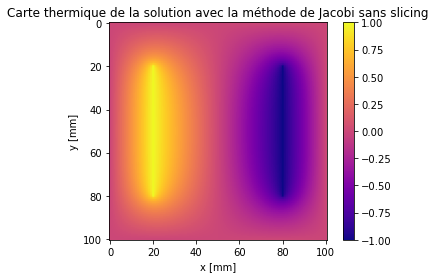

In [8]:
plot_solution(jacobi(M, V, target), "Jacobi sans slicing")

Effectivement, il faut beaucoup plus longtemps pour calculer la solution avec Jacobi sans slicing qu'avec Gauss-Seidel. Vérifions maintenant Jacobi avec slicing.

Pour ce faire, au lieu d'itérer sur tous les éléments individuellement pour les mettre à jour, on sélectionne la portion centrale de l'array, et on lui ajoute la moyenne des portions adjacentes. Il y a donc un seul "gros" calcul à faire au lieu de beaucoup de petits. Vérifions quel est l'effet sur le temps d'éxécution:

In [9]:
# BUT: Résoudre le problème du capaciteur électronique avec la méthode de Jacobi avec le slicing
# Arguments:
# M: nombre de carrés par côté dans l'array de la solution
# V: valeur absolue du potentiel de chaque plaque (la plaque gauche est négative et la plaque droite est positive) en volts
# target: précision recherchée

def jacobi_slicing(M, V, target):

    # On crée un array de dimension M+1 x M+1 (donc M carrés x M carrés)
    phi = zeros([M+1, M+1], float)
    phiprime = empty([M+1, M+1], float)

    # On initialise avec les conditions aux frontières, soit +/- V sur les plaques
    phi[20:80,20] = V
    phi[20:80,80] = -V

    delta = 1
    start = timeit.default_timer()

    # On boucle tant que la différence maximale d'un pas est supérieure à target
    while delta > target:

        # Pour chaque valeur excluant les parois, on additionne la moyenne des points environnants avec le slicing
        phiprime[1:M,1:M] = (phi[2:M+1,1:M]+phi[0:M-1,1:M]+phi[1:M,2:M+1]+phi[1:M,0:M-1])/4

        # On replace les conditions frontières sur les plaques (les parois ne changent pas dans l'équation précédente)
        phiprime[20:80,20] = V
        phiprime[20:80,80] = -V

        # On calcule la différence maximale avec le pas précédent
        delta = max(abs(phiprime-phi))

        # On échange les array pour la prochaine itération
        phi, phiprime = phiprime, phi

    end = timeit.default_timer()

    print(f"Temps d'éxécution pour Jacobi avec slicing = {end-start:.3f} secondes")

    return phi

Temps d'éxécution pour Jacobi avec slicing = 0.142 secondes


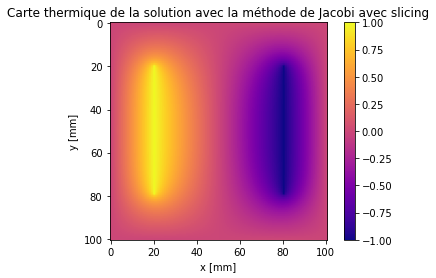

In [10]:
plot_solution(jacobi_slicing(M, V, target), "Jacobi avec slicing")

Les temps d'éxécution approximatifs (arrondis à la seconde près pour une éxécution sur notre ordinateur personnel) pour les trois méthodes sont:

Gauss-Seidel:           7 secondes

Jacobi sans slicing:    34 secondes

Jacobi avec slicing:    <1 seconde

On constate donc que, conformément à notre hypothèse de départ, Gauss-Seidel est plus rapide que Jacobi sans slicing, prenant environ $20\%$ du temps requis par Jacobi pour le calcul. Cependant, Jacobi avec slicing est beaucoup plus performant que les deux autres méthodes, prenant moins d'une seconde pour effectuer le calcul (0,142 secondes lorsque nous l'avons testé). 